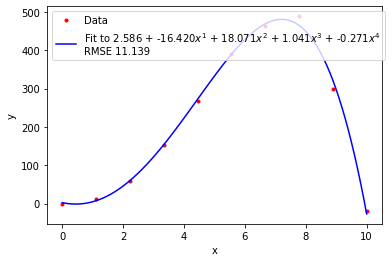

In [58]:
from solvematrix import solvematrix
from numpy import zeros, loadtxt, linspace
from pylab import plot, show, xlabel, ylabel, legend
from math import sqrt

# load and parse data
data = loadtxt("data.txt", float)  # import data
x = data[:,0]                       # x data
y = data[:,1]                       # y data
N = len(x)                          # number of data points

# Fit parameters
degree = 4                             # polynomial degree
A = zeros([degree+1, degree+1], float)  # empty matrix
v = zeros(degree+1, float)              # empty vector

# Rows i, columns j
for i in range(degree+1):
    v[i] = sum(y*x**i)              # vector
    for j in range(degree+1):   
        A[i,j] = sum(x**(i+j))      # matrix
a = solvematrix(A,v)                # calculate the fit coefficients

def f(x):
    p = 0
    for i in range(degree+1):
        p += a[i]*x**i
    return p

# Generate polynomial curve
M = 100                             # number of points for curve
xpol = linspace(x[0], x[-1], M)     # x values
ypol = zeros(M, float)              # initialize y values
for n in range(degree + 1):
    ypol += a[n]*xpol**n            # add each term in polynomial

s = 0.0
for i in range(len(y)):
    s+=(y[i] - f(x[i]))**2

rmse = sqrt(s / N)
fitstr = "Fit to %.3f" % a[0]
for i in range(1, degree+1):
        fitstr += " + %.3f$x^{i}$".format(i=i) % a[i]
fitstr += "\nRMSE %.3f" % rmse
# Plot results
plot(x,y, "r.", label="Data")
plot(xpol, ypol,"b-", label=fitstr)
xlabel("x")
ylabel("y")
legend(loc="upper left")
show()
## As you plot larger degrees like 10, you get a smaller and smaller rmse which indicates a better fit. However this does not mean a fit to a 10th degree polynomial is reasonable. In the case for the data.txt file as graphed below, is neither an overfit nor an underfit for the small data sample. 
## Degree of 10 gives an RMSE of 0.001

In [ ]:
## As you plot larger degrees like 10, you get a smaller and smaller rmse which indicates a better fit. However this does not mean a fit to a 10th degree polynomial is reasonable. In the case for the data.txt file as graphed below, is neither an overfit nor an underfit for the small data sample.